# Zadanie 0.

In [2]:
%matplotlib inline

import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

sns.set_style('whitegrid')
iris = load_iris()

In [4]:
def euclidean_distance(X, Y):  # X -> points, Y -> centroids
    dists = -2 * (X @ Y.T)
    dists += np.sum(Y ** 2, axis=1)
    dists += np.sum(X ** 2, axis=1)[:, np.newaxis]

    return np.abs(dists)

In [5]:
def k_means(data, how_many_groups, distance_func):
    data_len = len(data)
    centroids_idx = set()

    # for uniqueness sake
    while len(centroids_idx) != how_many_groups:
        centroids_idx = {np.random.randint(data_len) for _ in range(how_many_groups)}
    centroids = data[list(centroids_idx)]
    
    prev_group_mapping = np.array([42])
    curr_group_mapping = np.array([44])
    
    while not np.array_equal(prev_group_mapping, curr_group_mapping):
        # reassign objects to centroids...
        distance_matrix = distance_func(data, centroids)
        new_group_mapping = np.argsort(distance_matrix)[:, 0]
        prev_group_mapping = curr_group_mapping
        curr_group_mapping = new_group_mapping
        # ... then recalculate the centroids
        centroids = np.array([
            np.sum(group_members := data[curr_group_mapping == group_idx], 0)
            / (group_members.shape[0] or 1)  # to avoid dividing by zero
            for group_idx in range(how_many_groups)
        ])

    return curr_group_mapping

In [188]:
GROUPS_COUNT = 3

grouping = k_means(iris.data, GROUPS_COUNT, euclidean_distance)
cluster_names = np.array([f'Cluster #{idx}' for idx in range(GROUPS_COUNT)])

iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['cluster'] = grouping

iris_df = iris_df.assign(target=iris.target_names[iris_df['target']])
iris_df = iris_df.assign(cluster=cluster_names[iris_df['cluster']])

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,setosa,Cluster #2
1,4.9,3.0,1.4,0.2,setosa,Cluster #2
2,4.7,3.2,1.3,0.2,setosa,Cluster #2
3,4.6,3.1,1.5,0.2,setosa,Cluster #2
4,5.0,3.6,1.4,0.2,setosa,Cluster #2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,Cluster #0
146,6.3,2.5,5.0,1.9,virginica,Cluster #1
147,6.5,3.0,5.2,2.0,virginica,Cluster #0
148,6.2,3.4,5.4,2.3,virginica,Cluster #0


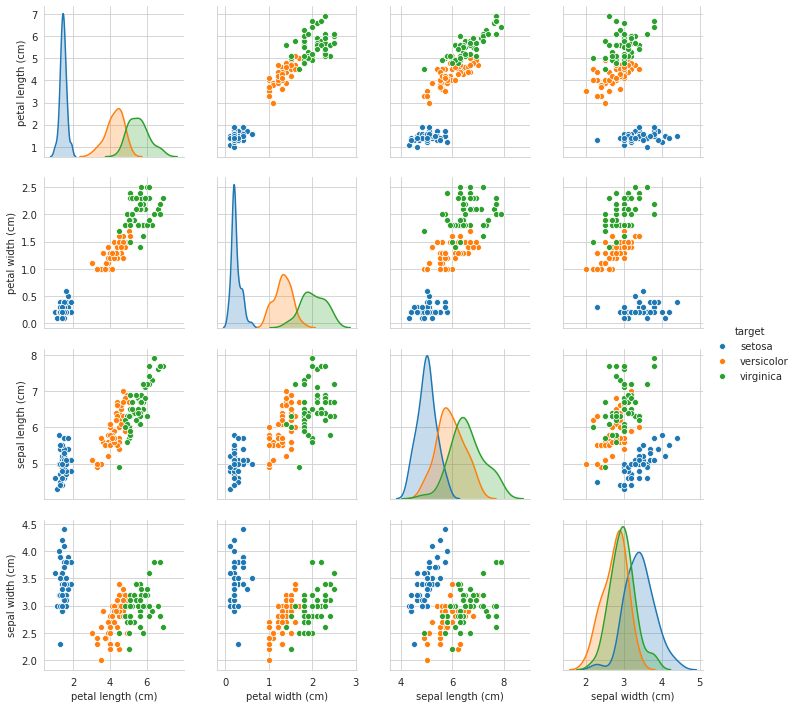

In [183]:
sns.pairplot(iris_df[set(iris_df.columns) - {'cluster'}], hue='target')

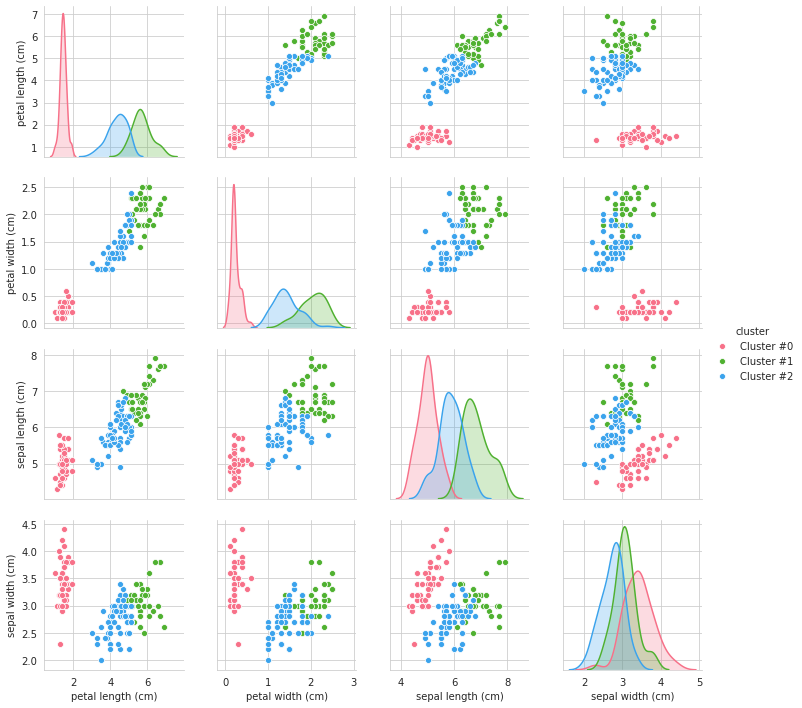

In [185]:
sns.pairplot(iris_df[set(iris_df.columns) - {'target'}], hue='cluster', palette='husl')

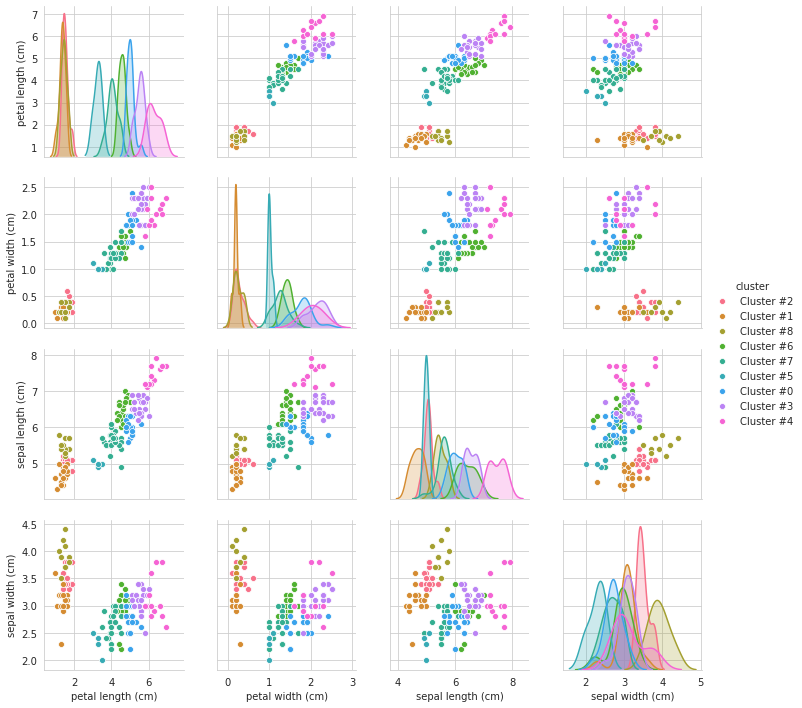

In [187]:
sns.pairplot(iris_df[set(iris_df.columns) - {'target'}], hue='cluster', palette='husl')

# Zadanie 1.

In [6]:
def generate_vectors(samples, dimensions, dists, dist_probs, mus, sigmas):
    sample_to_prob_mapping = np.array(
        random.choices(range(dists), k=samples, weights=dist_probs))
    # an array of N vectors taken from GAUSS(0, 1)
    rand_vars = np.random.randn(samples, dimensions)
    covariance_cholesky_left = np.linalg.cholesky(sigmas)
    # then, we take an appropriate 'mu' and do the calculation,
    # as shown on the lecture
    # TODO: can it be vectorized?
    return np.array([
        mus[sample_to_prob_mapping[idx]] \
            + covariance_cholesky_left[sample_to_prob_mapping[idx]] @ rand_vars[idx]
        for idx in range(samples)
    ])    

In [275]:
N, d, K = 5_000, 2, 5
p = np.ones(K) / K
Mu = 3 * np.ones((1, d)) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)

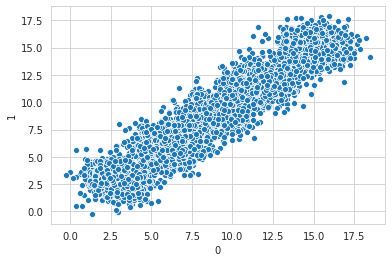

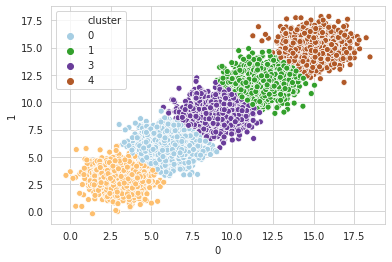

In [265]:
a = pd.DataFrame(generate_vectors(N, d, K, p, Mu, Sigma))
sns.scatterplot(a[0], a[1])
plt.show()

a_clusters = k_means(a.to_numpy(), K, euclidean_distance)
a['cluster'] = a_clusters
sns.scatterplot(x=0, y=1, hue='cluster', palette='Paired', data=a)
plt.show()

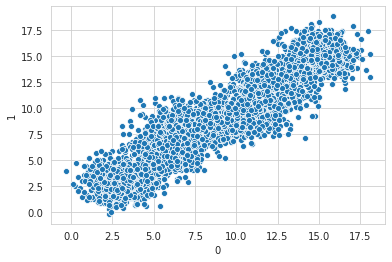

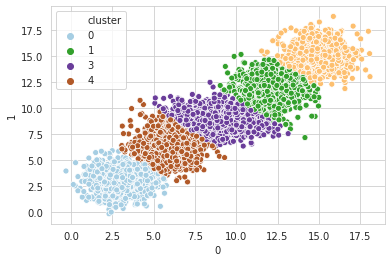

In [266]:
Sigma[2] = np.array([
    [3, 0],
    [0, 1]
])

b = pd.DataFrame(generate_vectors(N, d, K, p, Mu, Sigma))
sns.scatterplot(b[0], b[1])
plt.show()

b_clusters = k_means(b.to_numpy(), K, euclidean_distance)
b['cluster'] = b_clusters
sns.scatterplot(x=0, y=1, hue='cluster', palette='Paired', data=b)
plt.show()

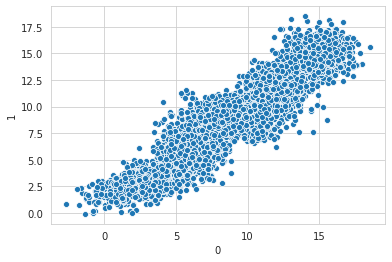

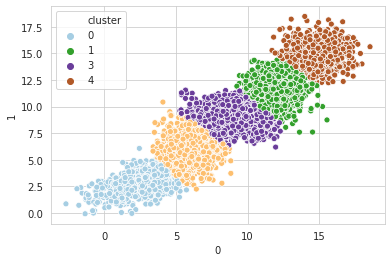

In [267]:
Sigma[0] = np.array([
    [3, 1],
    [1, 1]
])

c = pd.DataFrame(generate_vectors(N, d, K, p, Mu, Sigma))
sns.scatterplot(c[0], c[1])
plt.show()

c_clusters = k_means(c.to_numpy(), K, euclidean_distance)
c['cluster'] = c_clusters
sns.scatterplot(x=0, y=1, hue='cluster', palette='Paired', data=c)
plt.show()

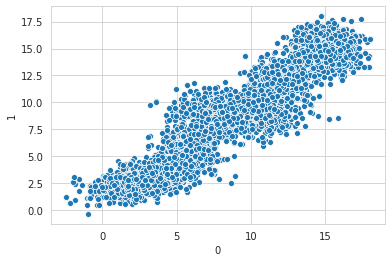

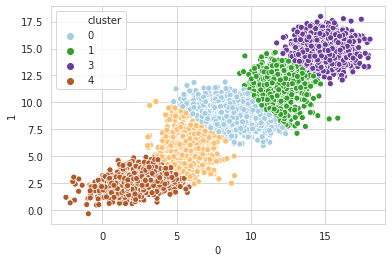

In [274]:
p = np.array([0.2, 0.1, 0.3, 0.1, 0.3])
task_d = pd.DataFrame(generate_vectors(N, d, K, p, Mu, Sigma))
sns.scatterplot(task_d[0], task_d[1])
plt.show()

task_d_clusters = k_means(task_d.to_numpy(), K, euclidean_distance)
task_d['cluster'] = task_d_clusters
sns.scatterplot(x=0, y=1, hue='cluster', palette='Paired', data=task_d)
plt.show()

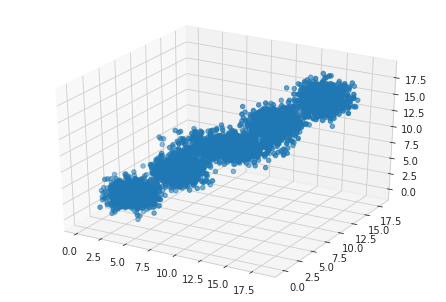

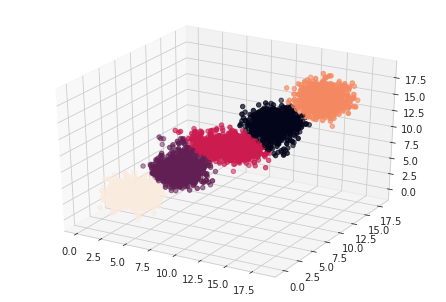

In [289]:
N, d, K = 5_000, 3, 5
p = np.ones(K) / K
Mu = 3 * np.ones((1, d)) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)

Sigma[2] = np.array([
    [3, 1, 0],
    [1, 1, 0],
    [0, 0, 1]
])

e = pd.DataFrame(generate_vectors(N, d, K, p, Mu, Sigma))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(e[0], e[1], e[2], marker='o')
plt.show()

e_clusters = k_means(e.to_numpy(), K, euclidean_distance)
e['cluster'] = e_clusters

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(e[0], e[1], e[2], c=e['cluster'])
plt.show()

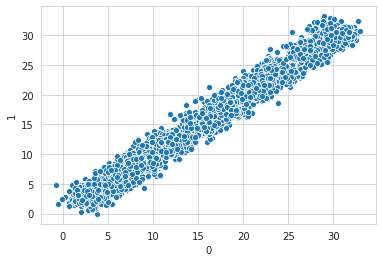

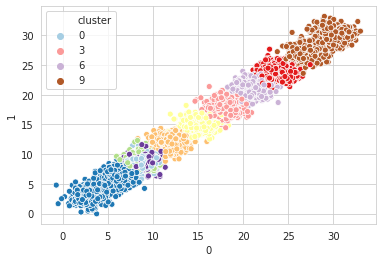

In [8]:
N, d, K = 5_000, 100, 10
p = np.ones(K) / K
Mu = 3 * np.ones((1, d)) * np.arange(1, K + 1)[:, np.newaxis]
Sigma = np.array([np.eye(d)] * K)


f = pd.DataFrame(generate_vectors(N, d, K, p, Mu, Sigma))
sns.scatterplot(f[0], f[1])
plt.show()

f_clusters = k_means(f.to_numpy(), K, euclidean_distance)
f['cluster'] = f_clusters
sns.scatterplot(x=0, y=1, hue='cluster', palette='Paired', data=f)
plt.show()